In [44]:
import pandas as pd
import numpy as np

from env import user, password, host

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

## Data Dictionary

In [43]:
data_dict = pd.read_excel('zillow_data_dictionary.xlsx')
data_dict.sort_values(by = 'Feature')

,Feature,Description
0,'airconditioningtypeid',Type of cooling system present in the home (i...
1,'architecturalstyletypeid',"Architectural style of the home (i.e. ranch, ..."
55,'assessmentyear',The year of the property tax assessment
2,'basementsqft',Finished living area below or partially below...
3,'bathroomcnt',Number of bathrooms in home including fractio...
4,'bedroomcnt',Number of bedrooms in home
6,'buildingclasstypeid',"The building framing type (steel frame, wood f..."
5,'buildingqualitytypeid',Overall assessment of condition of the buildi...
7,'calculatedbathnbr',Number of bathrooms in home including fractio...
11,'calculatedfinishedsquarefeet',Calculated total finished living area of the ...


# Acquire
Acquire 
- `bedroomcnt`, 
- `bathroomcnt`, 
-`calculatedfinishedsquarefeet`, 
- `taxvaluedollarcnt`, 
- `yearbuilt`, 
- `taxamount`, and 
- `fips`

from the zillow database for all 'Single Family Residential' properties.

### Function to connect to Codeup mysql server

In [2]:
def get_connection(database_name):
    '''
    This function takes in a database name from the sequel server and returns a string with 
    the credentials needed to access that server.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{database_name}'

### Function to acquire data from server
1. created a variable to hold query
2. can be updated or modified if want to make changes later

In [3]:
# 1. query used to acquire data from sql

query = '''select bedroomcnt,
    bathroomcnt,
    calculatedfinishedsquarefeet,
    taxvaluedollarcnt,
    yearbuilt,
    taxamount,
    fips
    from properties_2017
    where propertylandusetypeid = 261;'''

In [4]:
# 2. function to acquire data (uses the query)

def get_zillow_data():
    '''
    This function reads the zillow database from the Codeup mysql server adn returns a dataframe
    If a local csv file does not exist, this function writes the data to a csv file
    The local file can be used as a backup in the event that you cannot access the mysql database
    '''
    
    
    if os.path.isfile('zillow.csv'):
# if a local file already exists
        df = pd.read_csv('zillow.csv', index_col = 0)
        
    else:
# if a local file does not yet exist
        df = pd.read_sql(query, get_connection('zillow'))

# and cache data into csv file
        df.to_csv('zillow.csv')
    
    return df

### Taking a look at the data

In [5]:
# peak at the data

zillow = get_zillow_data()
zillow.head()

/usr/local/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


# 2. Summarization and Cleaning

In [6]:
print(f'Rows: {zillow.shape[0]}\nColumns: {zillow.shape[1]}')

Rows: 2152863
Columns: 7


In [7]:
zillow.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2152852.0,3.287196,0.954754,0.00,3.00,3.00,4.00,25.00
bathroomcnt,2152852.0,2.230688,0.999280,0.00,2.00,2.00,3.00,32.00
calculatedfinishedsquarefeet,2144379.0,1862.855178,1222.125124,1.00,1257.00,1623.00,2208.00,952576.00
taxvaluedollarcnt,2152370.0,461896.237963,699676.049600,1.00,188170.25,327671.00,534527.00,98428909.00
yearbuilt,2143526.0,1960.949681,22.162196,1801.00,1949.00,1958.00,1976.00,2016.00
taxamount,2148421.0,5634.865978,8178.910249,1.85,2534.98,4108.95,6414.32,1337755.86
fips,2152863.0,6048.377335,20.433292,6037.00,6037.00,6037.00,6059.00,6111.00


### Handling our null values

In [8]:
zillow.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    2152852 non-null  float64
 1   bathroomcnt                   2152852 non-null  float64
 2   calculatedfinishedsquarefeet  2144379 non-null  float64
 3   taxvaluedollarcnt             2152370 non-null  float64
 4   yearbuilt                     2143526 non-null  float64
 5   taxamount                     2148421 non-null  float64
 6   fips                          2152863 non-null  float64
dtypes: float64(7)
memory usage: 131.4 MB


In [9]:
# percentage of null values in each column to total values

print(f'{(zillow.isnull().sum()) / (zillow.shape[0])}')


bedroomcnt                      0.000005
bathroomcnt                     0.000005
calculatedfinishedsquarefeet    0.003941
taxvaluedollarcnt               0.000229
yearbuilt                       0.004337
taxamount                       0.002063
fips                            0.000000
dtype: float64


### ----> commented out: 
- We have such a small percentage of nulls compared to total that we can drop those rows

In [10]:
# # dropping null rows

# zillow.dropna(inplace = True)

In [11]:
# confirming no null values in df

zillow.isna().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

### Cleaning up our column names and data types

In [12]:
# looking at the values for each column and creating a cols list
cols = []

for col in zillow.columns:
    cols.append(col)
    print(col)
    print(zillow[col].value_counts())
    print('------------------------')
    print()

bedroomcnt
3.0     964298
4.0     634289
2.0     335473
5.0     150866
6.0      25166
1.0      23166
0.0      13187
7.0       4807
8.0       1107
9.0        291
10.0       121
11.0        34
13.0        16
12.0        12
14.0         7
15.0         6
18.0         3
16.0         2
25.0         1
Name: bedroomcnt, dtype: int64
------------------------

bathroomcnt
2.00     943589
3.00     422841
1.00     414324
2.50     142981
4.00      82155
1.50      31211
3.50      28518
5.00      28362
4.50      19506
0.00      13027
6.00      10747
5.50       6217
7.00       4394
8.00       1692
6.50       1333
9.00        713
7.50        384
10.00       325
11.00       146
8.50        110
12.00        73
9.50         50
13.00        39
14.00        25
15.00        17
0.50         16
10.50        14
16.00        12
18.00         8
20.00         6
17.00         4
1.75          3
12.50         3
11.50         3
14.50         1
32.00         1
19.50         1
19.00         1
Name: bathroomcnt, dtype: i

In [13]:
cols

['bedroomcnt',
 'bathroomcnt',
 'calculatedfinishedsquarefeet',
 'taxvaluedollarcnt',
 'yearbuilt',
 'taxamount',
 'fips']

In [14]:
# renaming columns

zillow.rename(columns = {'bedroomcnt': 'bedrooms',
                         'bathroomcnt': 'bathrooms',
                         'calculatedfinishedsquarefeet': 'sqft',
                         'taxvaluedollarcnt': 'tax_value',
                         'yearbuilt': 'year_built',
                         'taxamount': 'tax_amt',
                         'fips': 'fips'}, inplace = True)

In [15]:
# preparing for loop that converts floats ------> to integers by creating 2 lists from columns
cols = zillow.columns
cols = cols.to_list()
print(f'All columns: {cols}\n')

flt_cols = ['bathrooms', 'sqft', 'tax_value', 'tax_amt']
int_cols = ['bedrooms', 'year_built', 'fips']
print(f'Float columns: {flt_cols}')
print(f'Integer columns: {int_cols}')

All columns: ['bedrooms', 'bathrooms', 'sqft', 'tax_value', 'year_built', 'tax_amt', 'fips']

Float columns: ['bathrooms', 'sqft', 'tax_value', 'tax_amt']
Integer columns: ['bedrooms', 'year_built', 'fips']


### Conversion to integer commented out for now because of nulls

In [16]:
# # for loop to convert floats to -----> int

# for col in int_cols:
#     zillow[col] = zillow[col].astype(int)

In [17]:
# confirming our dtypes have been updated

zillow.dtypes

bedrooms      float64
bathrooms     float64
sqft          float64
tax_value     float64
year_built    float64
tax_amt       float64
fips          float64
dtype: object

https://github.com/CodeupClassroom/germain-regression-exercises/blob/main/wrangle_exercise_review.ipynb
<br><i>referenced for loop from Germain regression wrange_exercises_review.ipynb solutions</i>

In [18]:
cols

['bedrooms', 'bathrooms', 'sqft', 'tax_value', 'year_built', 'tax_amt', 'fips']

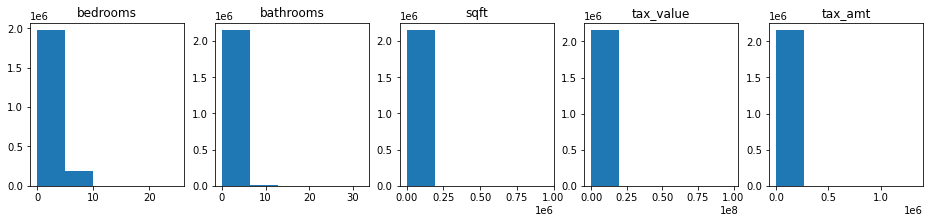

In [19]:
# variable distributions

plt.figure(figsize = (16, 3))

# list of columns
cols = [col for col in zillow.columns if col not in ['fips', 'year_built']]

for i, col in enumerate(cols):
    # i starts at 0, but I want the plot number to start at 1 ---> adding 1
    plot_number = i + 1

    # create subplots    
    plt.subplot(1, len(cols), plot_number)
    
    # title with column name
    plt.title(col)
    
    # creating histogram columns
    zillow[col].hist(bins = 5)

    # hiding gridlines
    plt.grid(False)

plt.show()

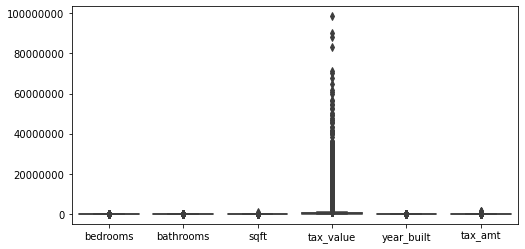

In [20]:
# boxplots
plt.figure(figsize = (8, 4))

plt.ticklabel_format(useOffset = False, style = 'plain')
sns.boxplot(data = zillow.drop(columns = ['fips']))

plt.show()

### There are a lot of outliers in the dataset that need to be removed prior to exploration
- We can use the iqr rule to remove outliers

In [21]:
zil_cols = zillow.columns.to_list()

In [22]:
# function to remove outliers
def remove_outliers(df, k, cols):
    '''
    This function uses the iqr rule to remove outliers from a list of columns in a DataFrame.
       - Args:
            - df: DataFrame
            - k: upper and lower bound +/- value
            - cols: DataFrame columns (want outliers removed from)
        - Returns:
            - DataFrame with outliers removed from chosen columns
    '''
    
    for col in cols:
        
    #     get quartiles
        q1, q3 = df[col].quantile([.25, .75])

    #     calculate interquartile range (iqr range)
        iqr = q3 - q1

    #     get upper and lower bounds
        upper_bound = q3 + k * iqr
        lower_bound = q1 - k * iqr

    #     return dataframe without outliers
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    
    return df

In [23]:
zillow_no_outliers = remove_outliers(zillow, 1.5, cols)
zillow_no_outliers.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amt,fips
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0
20,3.0,2.0,1222.0,290492.0,1951.0,3870.25,6037.0


### Taking a look at the distribution

In [24]:
print(f'zil_cols: {zil_cols}')
print()
print(f'cols: {cols}')

zil_cols: ['bedrooms', 'bathrooms', 'sqft', 'tax_value', 'year_built', 'tax_amt', 'fips']

cols: ['bedrooms', 'bathrooms', 'sqft', 'tax_value', 'tax_amt']


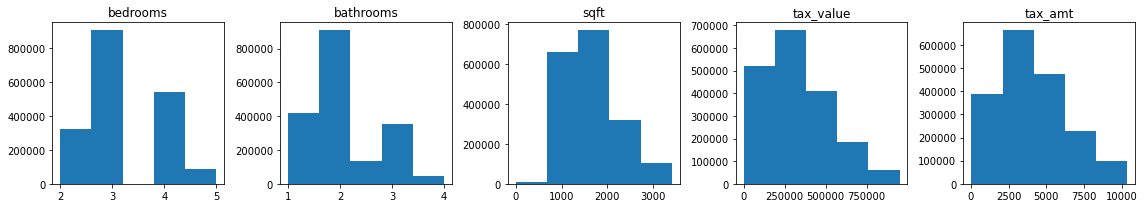

In [25]:
# histograms
plt.figure(figsize = (16, 3))

for i, col in enumerate(cols):
    
#     i starts at 0, but plot numbers should start at 1
    plot_number = i + 1
    
#     create subplot
    plt.subplot(1, len(cols), plot_number)
    
#     title as column name
    plt.title(col)
    
#     display histograms from each column
    zillow_no_outliers[col].hist(bins = 5)
    
#     hide gridlines
    plt.grid(False)
    
#     add padding to prevent plot overlap
    plt.tight_layout()

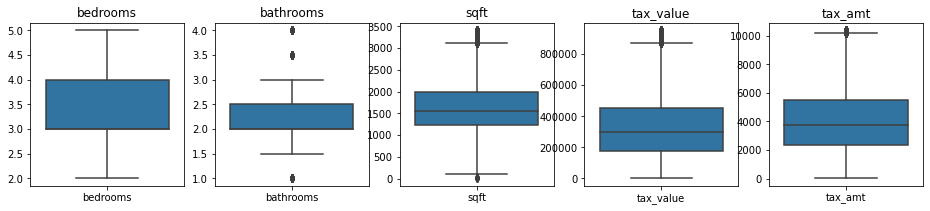

In [26]:
# boxplots
plt.figure(figsize = (16, 3))

for i, col in enumerate(cols):
#     i starts at 0, but plot should start at 1
    plot_number = i + 1
    
#     create subplot
    plt.subplot(1, len(cols), plot_number)
    
#     title with column names
    plt.title(col)
    
#     display boxplots for column
    sns.boxplot(data = zillow_no_outliers[[col]])
    
    

### Summary Takeaways:
>`bedrooms` and `bathrooms` are not normally distributed

# Prepare
- Are there any null values?

In [28]:
zillow_no_outliers.isna().sum()

bedrooms        0
bathrooms       0
sqft            0
tax_value       0
year_built    874
tax_amt         0
fips            0
dtype: int64

### Imputing year_built

In [30]:
zillow_no_outliers.year_built.value_counts()

1955.0    80451
1950.0    66876
1954.0    65523
1953.0    58746
1956.0    58054
          ...  
1855.0        1
1874.0        1
1807.0        1
1833.0        1
1823.0        1
Name: year_built, Length: 152, dtype: int64

##### Because of the small number of missing values, will impute year_build after split

### Looking at the data types

In [31]:
zillow_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1855285 entries, 6 to 2152862
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   bedrooms    float64
 1   bathrooms   float64
 2   sqft        float64
 3   tax_value   float64
 4   year_built  float64
 5   tax_amt     float64
 6   fips        float64
dtypes: float64(7)
memory usage: 113.2 MB


In [32]:
# looking at the values to determine which, if any, should be converted from float to int
for col in zillow_no_outliers.columns:
    print(col.upper())
    print(zillow_no_outliers[col].value_counts())
    print('--------------------')
    print()

BEDROOMS
3.0    905249
4.0    539886
2.0    320685
5.0     89465
Name: bedrooms, dtype: int64
--------------------

BATHROOMS
2.00    909673
1.00    385962
3.00    352086
2.50    132451
4.00     31976
1.50     30752
3.50     12382
1.75         3
Name: bathrooms, dtype: int64
--------------------

SQFT
1200.0    5091
1080.0    4318
1120.0    4287
1400.0    3776
1440.0    3618
          ... 
404.0        1
430.0        1
471.0        1
317.0        1
462.0        1
Name: sqft, Length: 3015, dtype: int64
--------------------

TAX_VALUE
450000.0    806
500000.0    754
400000.0    701
430000.0    677
475000.0    671
           ... 
877774.0      1
172618.0      1
581746.0      1
205760.0      1
366635.0      1
Name: tax_value, Length: 457592, dtype: int64
--------------------

YEAR_BUILT
1955.0    80451
1950.0    66876
1954.0    65523
1953.0    58746
1956.0    58054
          ...  
1855.0        1
1874.0        1
1807.0        1
1833.0        1
1823.0        1
Name: year_built, Length: 152,

### will cast fips and year_built as objects bc they are currently numerical representations of categorical values

In [34]:
zillow_no_outliers.fips = zillow_no_outliers.fips.astype(object)
zillow_no_outliers.year_built = zillow_no_outliers.year_built.astype(object)

In [35]:
zillow_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1855285 entries, 6 to 2152862
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   bedrooms    float64
 1   bathrooms   float64
 2   sqft        float64
 3   tax_value   float64
 4   year_built  object 
 5   tax_amt     float64
 6   fips        object 
dtypes: float64(5), object(2)
memory usage: 113.2+ MB


## Do my columns contain a target leak?
>Model Goal:<br>
build a ML model that can predict a property's value<br>

`tax_amt` is determined by a real estate tax appraiser's valuation of the home, combined with the local tax rate<br>

### Target Leak:
>Does this indirectly represent the target variable?<br>
Does this represent information that we wouldn't have at the time we use our model to predictions on new data?


Reasons a tax appraiser's value may deviate from from the sale price of a property:
- inversely related incentives (incentive to reduce `tax appraised value` but to increase `sale price property value`)
- Counties may limit `tax appraised value` increase to a set amt, causing them to lag behind `home values` in a hot market
- local tax appraisers evaluate homes based on evaluation criteria that can differ from county to county or year to year based on political and administrative pressures

#### For now we will leave `tax_amt` in the data set as it is not clear that it indirectly represents the target variable. 

# Split the Data

In [46]:
train_validate, test = train_test_split(zillow_no_outliers, test_size = .2, random_state = 123)
train, validate = train_test_split(train_validate, test_size = .3, random_state = 123)

# Impute missing year_build values with mode

In [48]:
# build imputer
imputer = SimpleImputer(strategy = 'median')

# fit to train
imputer.fit(train[['year_built']])

# transform the data using imputed values
train[['year_built']] = imputer.transform(train[['year_built']])
validate[['year_built']] = imputer.transform(validate[['year_built']])
test[['year_built']] = imputer.transform(test[['year_built']])

In [57]:
# for loop to verify missing values imputed in all three datasets

for df in train, validate, test:
    print(df.isna().sum())
    print('-----------------------')
    print()

bedrooms      0
bathrooms     0
sqft          0
tax_value     0
year_built    0
tax_amt       0
fips          0
dtype: int64
-----------------------

bedrooms      0
bathrooms     0
sqft          0
tax_value     0
year_built    0
tax_amt       0
fips          0
dtype: int64
-----------------------

bedrooms      0
bathrooms     0
sqft          0
tax_value     0
year_built    0
tax_amt       0
fips          0
dtype: int64
-----------------------



# for final wrangle.py file
>a. Imports<br>
b. `acquire_zillow` function<br>
c. `remove_outliers` function<br>
d. data visualizations<br>
- d-01. `get_hist` histograph function
- d-02. `get_box` boxplots function

> e. `prepare_zillow` function
- e-01. remove outliers
- e-02. visualizations to get distributions of numeric data
    - e-02a. `get_hist` histographs
    - e-02b. `get_box` boxplots
- e-03. convert `fips` and `year_built` columns to objects
- e-04. train/valiate/test split
- e-05. impute year using median

## Final function
`wrangle_zillow` will take in the above functions and code and return three DataFrames, prepared for exploration